# Explore here

In [16]:
# Your code here

# Bibliotecas necesarias
import json
import zipfile
import os
import pandas as pd
from PIL import Image
import random



In [2]:
root_path = '/content'

In [15]:
!pip install kaggle
!mkdir ~/.kaggle
!touch '/root/.kaggle/kaggle.json'

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
## Appi token
api_token = {"username":"mariabottini","key":"c42ced77c7a4dad1b77074db5009ff14"}

In [5]:
with open("/root/.kaggle/kaggle.json", "w") as file:
 json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats

 99% 805M/812M [00:09<00:00, 75.4MB/s]
100% 812M/812M [00:09<00:00, 92.1MB/s]


In [7]:
for file in os.listdir():
 if file.endswith(".zip"):
  zip_ref = zipfile.ZipFile(file, "r")
  zip_ref.extractall()
  zip_ref.close()

In [8]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.preprocessing import image
# Define los caminos a los archivos zip
train_zip_path = '/content/train.zip'
test_zip_path = '/content/test1.zip'
# Define los directorios donde se descomprimirán los archivos
train_dir = '/content/train'
test_dir = '/content/test1'
# Función para descomprimir archivos zip
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
# Descomprime los archivos zip
unzip_file(train_zip_path, train_dir)
unzip_file(test_zip_path, test_dir)

In [9]:
train_dir = "/content/train/train"
test_dir = "/content/test1/test1"

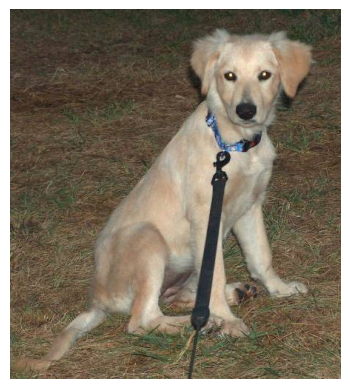

Dimensiones de la imagen: (447, 500)


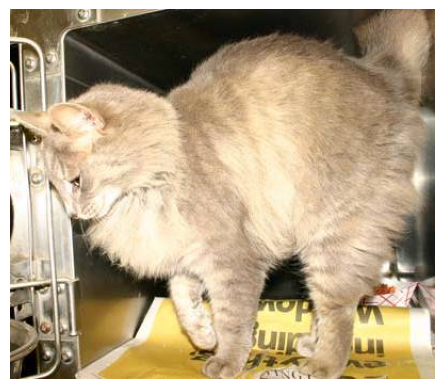

Dimensiones de la imagen: (399, 347)


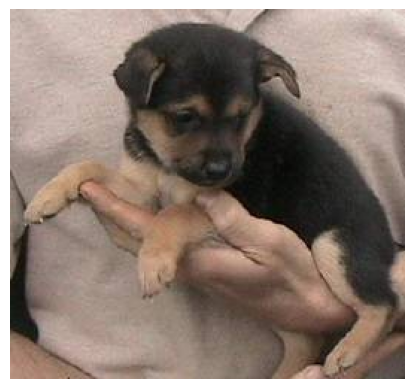

Dimensiones de la imagen: (265, 248)


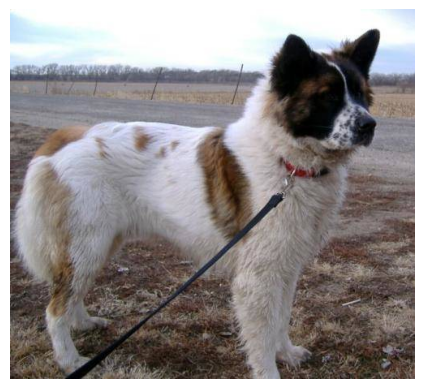

Dimensiones de la imagen: (499, 456)


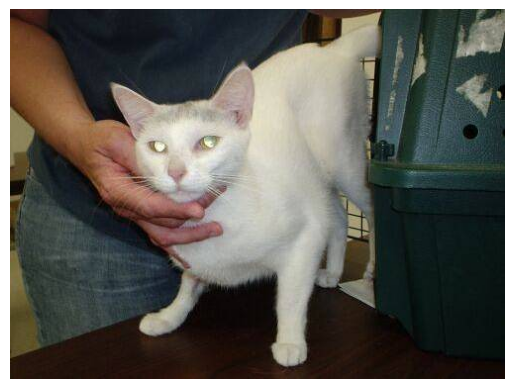

Dimensiones de la imagen: (500, 374)


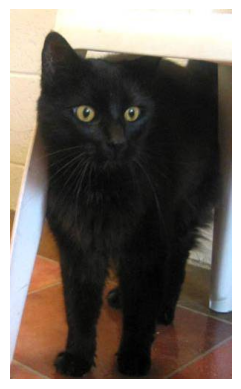

Dimensiones de la imagen: (299, 499)


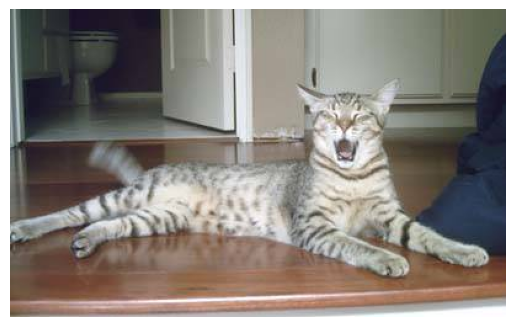

Dimensiones de la imagen: (403, 250)


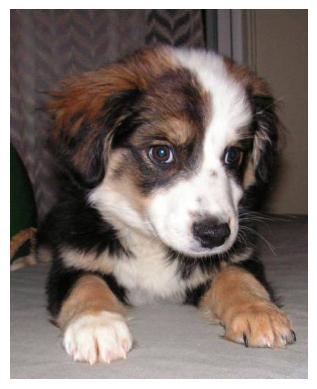

Dimensiones de la imagen: (402, 500)


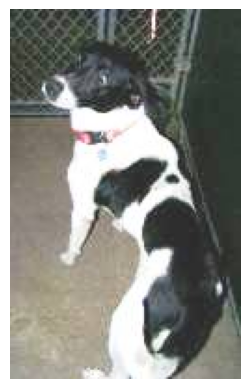

Dimensiones de la imagen: (124, 199)


In [10]:
from PIL import Image
import matplotlib.pyplot as plt

# Obtener una lista de archivos de imagen en el directorio de entrenamiento
train_images = os.listdir(train_dir)

# Función para mostrar una imagen y sus dimensiones
def show_image(image_path):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    print(f'Dimensiones de la imagen: {image.size}')

# Mostrar las primeras 5 imágenes y sus dimensiones
for i in range(9):
    image_path = os.path.join(train_dir, train_images[i])
    show_image(image_path)

In [11]:
# Paso 2: Visualiza la información de entrada

def load_images(folder, img_size=(200, 200), sample_count=20, label_filter=None):
    images = []
    labels = []
    filenames = os.listdir(folder)

    if label_filter is not None:
        filenames = [fname for fname in filenames if label_filter in fname]

    random.shuffle(filenames)
    for img in filenames[:sample_count]:
        try:
            img_path = os.path.join(folder, img)
            img_pil = Image.open(img_path)
            img_pil = img_pil.resize(img_size)
            img_np = np.array(img_pil) / 255.0  # Normalize pixel values
            images.append(img_np)
            labels.append(0 if 'cat' in img else 1)
        except Exception as e:
            print(f"Error loading image {img}: {e}")

    return np.array(images), np.array(labels)

In [12]:
def visualize_images(images, labels, sample_count=20):
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.flatten()

    for i in range(sample_count):
        axes[i].imshow(images[i])
        axes[i].set_title('Cat' if labels[i] == 0 else 'Dog')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

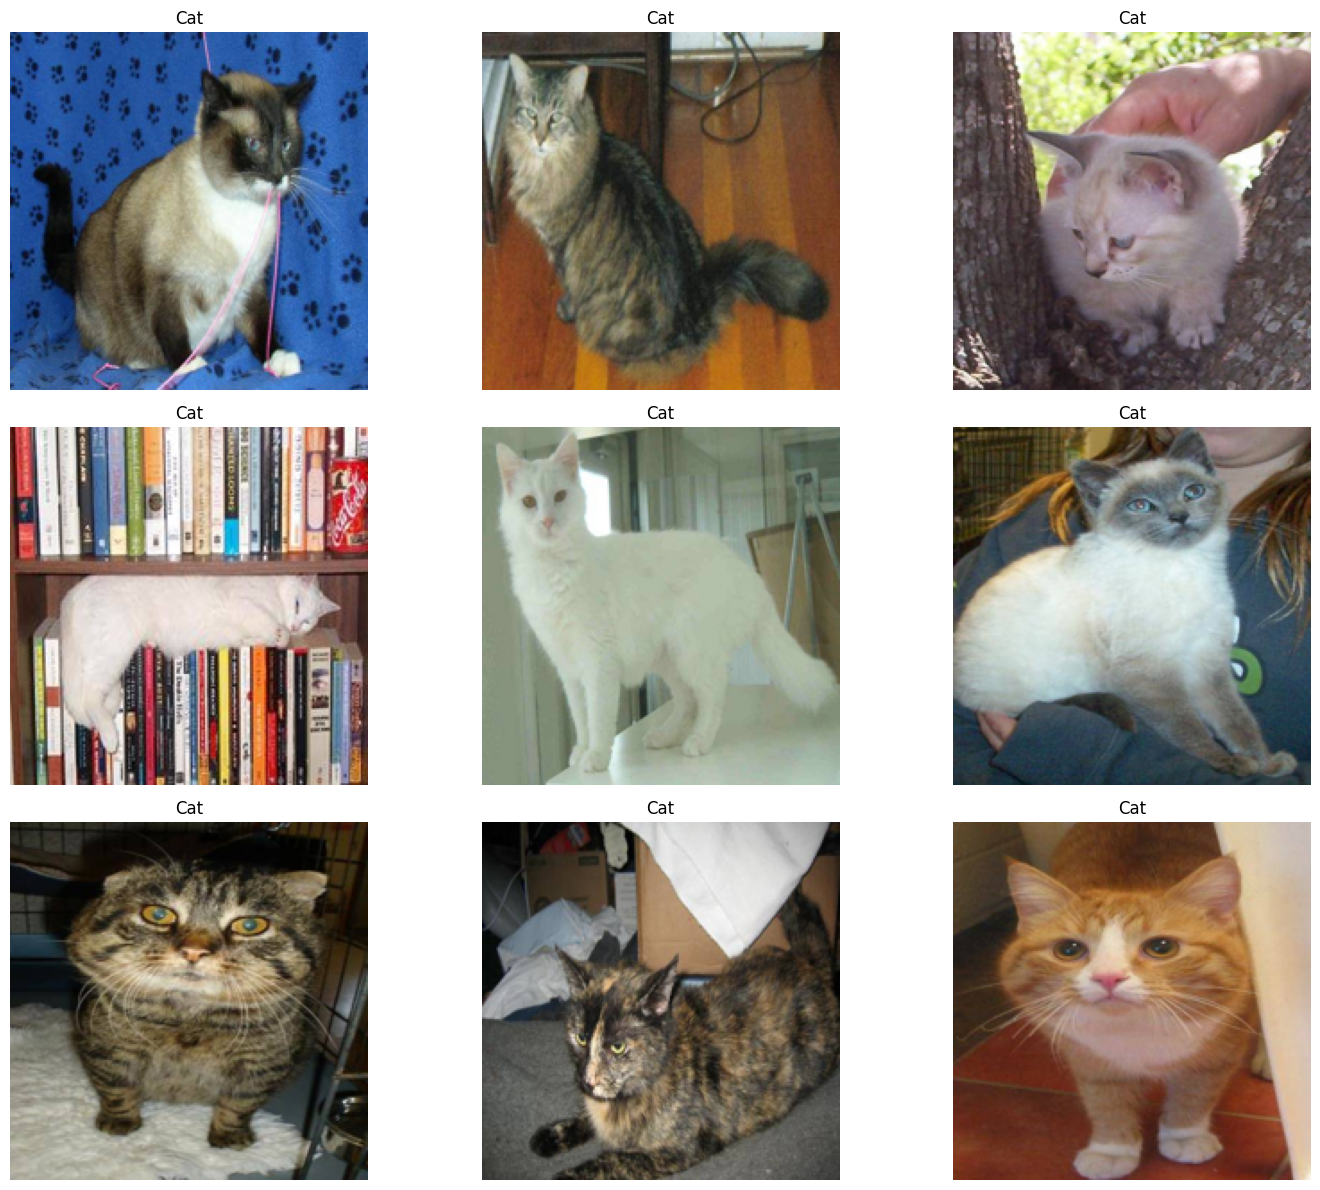

In [13]:
cat_images, cat_labels = load_images(train_dir, sample_count=20, label_filter='cat')
visualize_images(cat_images, cat_labels, sample_count=20)

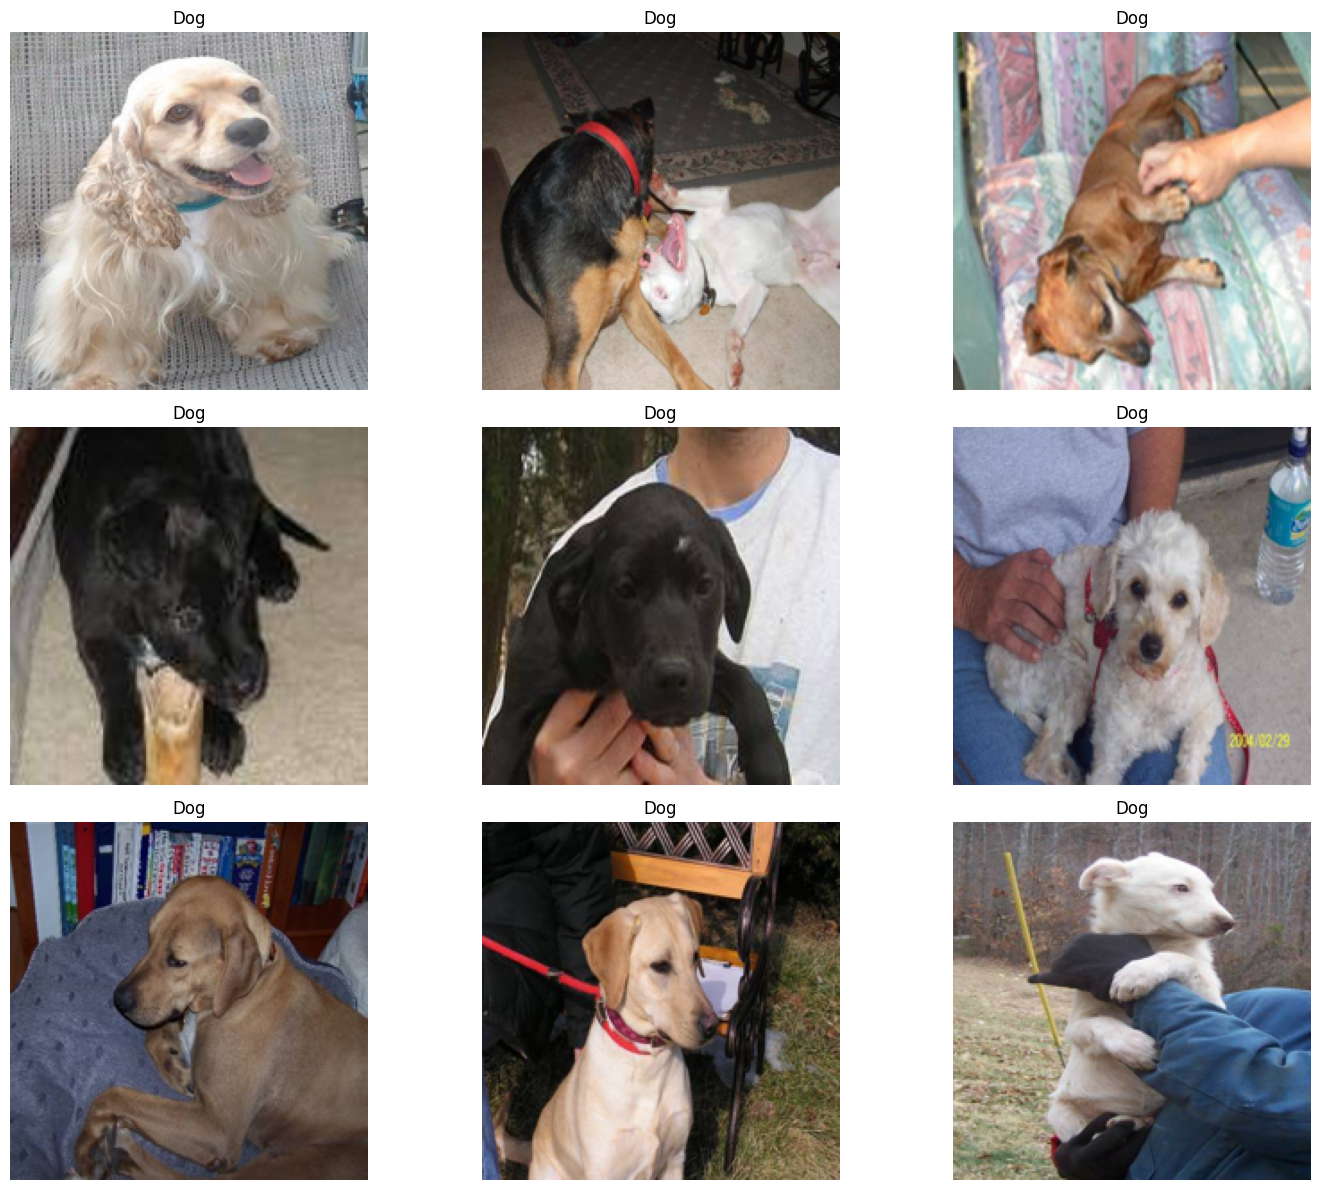

In [14]:
dog_images, dog_labels = load_images(train_dir, sample_count=9, label_filter='dog')
visualize_images(dog_images, dog_labels, sample_count=9)

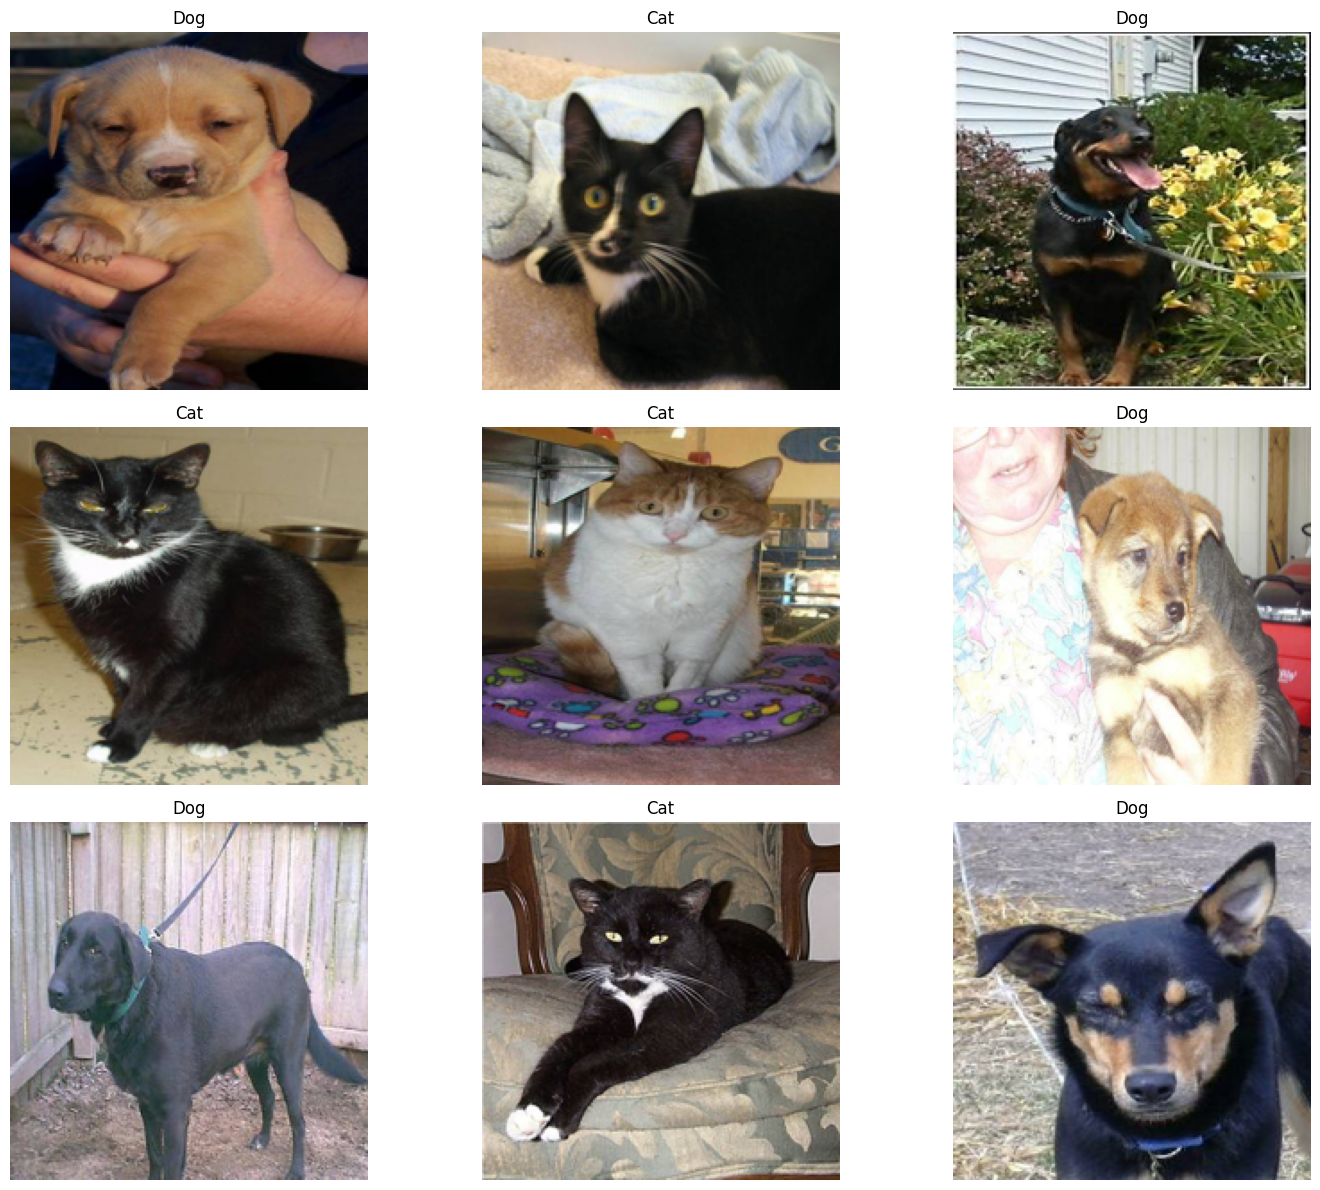

In [20]:
all_images, all_labels = load_images(train_dir, sample_count=9)
visualize_images(all_images, all_labels, sample_count=9)

In [46]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

# Definir algunas reglas para DataGen
root_path = "/content/train/train/cat.0.jpg"
root_path
image_size = (200, 200)

datagentrain = ImageDataGenerator()
# datagentest = ImageDataGenerator()


# Generación de datos de entrenamiento
train_data = datagentrain.flow_from_directory(
    root_path,
    target_size = image_size,
    classes = ["Cat", "Dog"]
)

# # Generación de datos de prueba
# test_data = datagentest.flow_from_directory(
#     train_dir,
#     target_size = image_size,
#     classes = ["test"]
# )

Found 0 images belonging to 2 classes.


In [16]:
# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_subfolder = os.path.join(train_dir, "dog")

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_image_files = os.listdir(dog_subfolder)

# # Cargar las nueve primeras imágenes de perros
# dog_images = []
# for i in range(9):
#     img_path = os.path.join(dog_subfolder, dog_image_files[i])
#     img = image.load_img(img_path)  # Ajuste target_size según sea necesario
#     img_array = image.img_to_array(img)
#     img_array /= 255.0  # Normalice los valores de los píxeles a [0, 1].
#     dog_images.append(img_array)

# # Cree una única figura para mostrar las nueve imágenes
# plt.figure(figsize=(12, 8))

# for i in range(9):
#     plt.subplot(3, 3, i + 1)
#     plt.imshow(dog_images[i])
#     plt.title('Dog Image')
#     plt.axis('off')

# # Ajustar el diseño
# plt.tight_layout()

# # Mostrar las imágenes
# plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/train/train/dog'

In [21]:
# Obtener una lista de todos los nombres de archivos de imágenes de perros
cats_subfolder = os.path.join(train_dir, "cat")

In [23]:

# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_image_files = os.listdir(cats_subfolder)


FileNotFoundError: [Errno 2] No such file or directory: '/content/train/train/cat'